Train samples: 1601, Test samples: 284

Logistic Regression: Predicting Opioid Use
Accuracy: 0.655
AUC: 0.595

Confusion Matrix:
 [[167  34]
 [ 64  19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       201
           1       0.36      0.23      0.28        83

    accuracy                           0.65       284
   macro avg       0.54      0.53      0.53       284
weighted avg       0.62      0.65      0.63       284



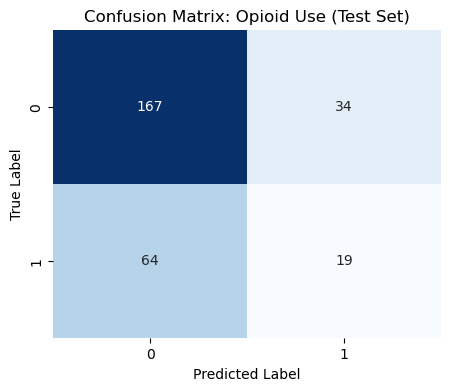

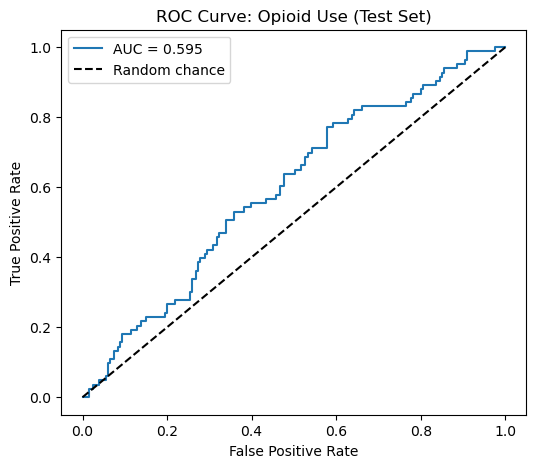

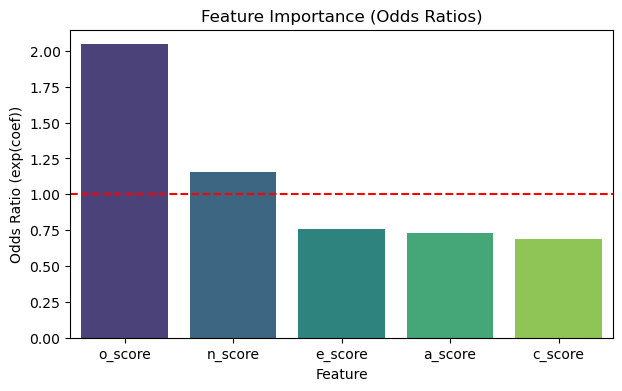

In [10]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)

df = pd.read_csv("drug_consumption.csv") # reads in data

train_df = df[(df["country"] == 0.96082) | (df["country"] == -0.57009)]  # training data just US and UK
test_df = df[~df.index.isin(train_df.index)] # test data is other countries

print(f"Train samples: {len(train_df)}, Test samples: {len(test_df)}")


predictors = [ "e_score", "o_score", "c_score",'n_score','a_score'] # identifies predictors used, which are the personality scores
X_train = train_df[predictors]
X_test = test_df[predictors]

y_train = ((train_df["heroin"] != "CL0") | (train_df["meth"] != "CL0")).astype(int) # 1 if used either drug, 0 is no use
y_test = ((test_df["heroin"] != "CL0") | (test_df["meth"] != "CL0")).astype(int) # 1 if used either drug, 0 is no use

# below I am scaling the predictors with mean 0 and sd of 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit the logistic regression model below
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

# using model as prediction on test data
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# computes accuracy and AUC below to evaluate the model
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\nLogistic Regression: Predicting Opioid Use")
print(f"Accuracy: {acc:.3f}")
print(f"AUC: {auc:.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# creates confusion matrix for nice visualization of predictions
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix: Opioid Use (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# displays ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Opioid Use (Test Set)")
plt.legend()
plt.show()

# displays how odds changes based on the different personality scores
coef = log_reg.coef_[0]
odds_ratios = np.exp(coef)
importance_df = pd.DataFrame({"Feature": predictors,"OddsRatio": odds_ratios,"Coefficient": coef}).sort_values("OddsRatio", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(data=importance_df, x="Feature", y="OddsRatio", palette="viridis")
plt.axhline(1, color='red', linestyle='--')
plt.title("Feature Importance (Odds Ratios)")
plt.ylabel("Odds Ratio (exp(coef))")
plt.show()

In [11]:
# class imbalance
used = sum((train_df["heroin"] != "CL0") | (train_df["meth"] != "CL0"))


print('Percentage that have used Heroin or Meth', round(used/len(train_df),3))
print('Percentage that have not used Heroin or Meth', round(1-(used/len(train_df)),3))

Percentage that have used Heroin or Meth 0.277
Percentage that have not used Heroin or Meth 0.723



Logistic Regression (Training Set): Predicting Opioid Use
Accuracy: 0.749
AUC: 0.754

Confusion Matrix:
 [[1072   86]
 [ 316  127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84      1158
           1       0.60      0.29      0.39       443

    accuracy                           0.75      1601
   macro avg       0.68      0.61      0.61      1601
weighted avg       0.72      0.75      0.72      1601



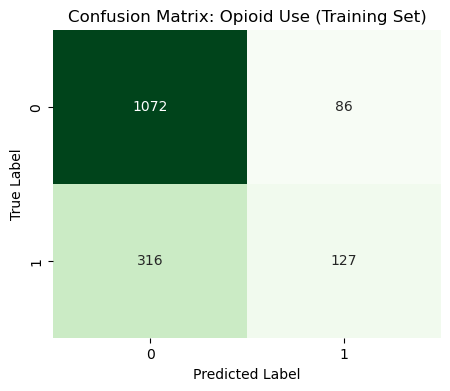

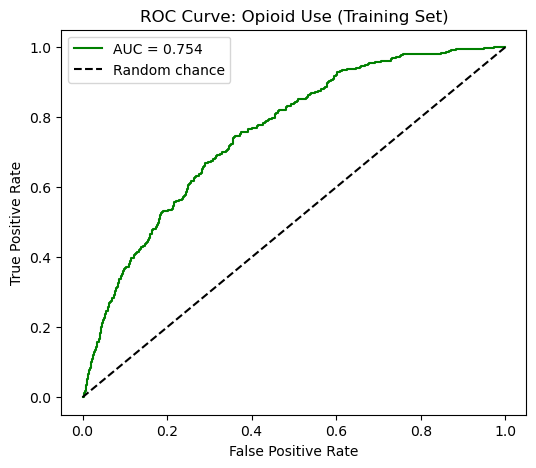

In [12]:
# train set evaluation
y_train_pred = log_reg.predict(X_train_scaled)
y_train_prob = log_reg.predict_proba(X_train_scaled)[:, 1]

# compute training accuracy and AUC
train_acc = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_prob)

print("\nLogistic Regression (Training Set): Predicting Opioid Use")
print(f"Accuracy: {train_acc:.3f}")
print(f"AUC: {train_auc:.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# visualize confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix: Opioid Use (Training Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# visualize ROC curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr_train, tpr_train, label=f"AUC = {train_auc:.3f}", color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Random chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Opioid Use (Training Set)")
plt.legend()
plt.show()